In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

import DAQSimulator
import EventGenerator

plt.style.use("~/evanstyle.mplstyle")

In [21]:
egen = EventGenerator.EventGenerator("configs/example.yml")

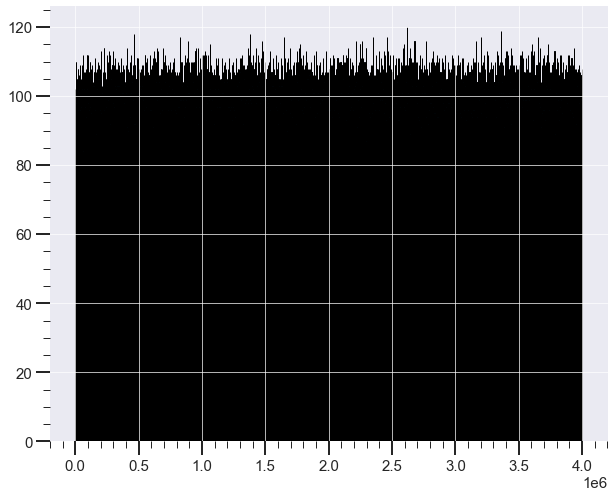

In [24]:
egen.generate_particle_times(1)

{'events': {'beam_intensity': '1e6', 'spill_duration': 4, 'trigger_efficiency': 0.8, 'noise_rate': 5, 'miss_probability': '1e-3', 'n_lappds': 2}, 'daq': {'digitization_time': 85, 'acdc_to_acc': 500, 'acc_to_pc': 10000, 'acdc_fifo': 20, 'acc_fifo': 300}}
